## Data Preparation

### Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset/forestfires.csv')

In [3]:
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Data Information

`X`      : x-axis spatial coordinate within the Montesinho park map: 1 to 9   
`Y`      : y-axis spatial coordinate within the Montesinho park map: 2 to 9   
`month`  : month of the year: "jan" to "dec"                                
`day`    : day of the week: "mon" to "sun"                                  
`FFMC`   : FFMC index from the FWI system: 18.7 to 96.20                    
`DMC`    : DMC index from the FWI system: 1.1 to 291.3                      
`DC`     : DC index from the FWI system: 7.9 to 860.6                       
`ISI`    : ISI index from the FWI system: 0.0 to 56.10                      
`temp`   : temperature in Celsius degrees: 2.2 to 33.30                     
`RH`     : relative humidity in %: 15.0 to 100                              
`wind`   : wind speed in km/h: 0.40 to 9.40                                 
`rain`   : outside rain in mm/m2 : 0.0 to 6.4                               
`area`   : the burned area of the forest (in ha): 0.00 to 1090.84          

- `FFMC` (Fine Fuel Moisture Code) menunjukkan kadar air permukaan serasah (di bawah naungan kanopi hutan) berupa tumpukan dedaunan kering, rerantingan, dan berbagai sisa vegetasi lainnya yang mempengaruhi penyulutan dan penyebaran api.`FFMC` dipengaruhi oleh `rain`(hujan), `RH` (kelembapan relatif), `temp` (suhu), dan `wind` (angin). 

- `DMC` (Duff Moisture Code) mewakili kadar air lapisan organik tidak padat dibawah lapisan serasah bagian dangkal berupa materi berkayu berukuran sedang yang mengindikasikan konsumsi bahan bakar. `DMC` dipengaruhi oleh `rain`, `RH`, dan `temp`. 

- `DC` (Drought Code) mewakili kadar air lapisan organik padat dibawah lapisan dalam berupa materi kayu berukuran besar yang mempengaruhi intensitas kebakaran dan potensi kabut asap. `DC` dipengaruhi oleh `rain` dan `temp`. 

- `ISI` (Intitial Spread Index) adalah skor yang berkorelasi dengan penyebaran kecepatan api dengan menggabungkan `wind` dan `FFMC`, sedangkan `BUI` mewakili jumlah bahan bakar yang tersedia yang merupakan kombinasi dari `DMC` dan `DC`. Indeks FWI merupakan indikator intensitas kebakaran dan menggabungkan `ISI` dan `BUI`

Source:

https://media.neliti.com/media/publications/191646-ID-sistem-informasi-tingkat-bahaya-kebakara.pdf

https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


## Preprocessing Data

### Check Missing Data

In [5]:
dataset.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Check Duplicate Data

In [6]:
print("jumlah baris data:", dataset.shape[0])
print("jumlah data terduplikat:", dataset.duplicated().sum())

jumlah baris data: 517
jumlah data terduplikat: 4


In [7]:
# Menghapus data duplikat
dataset.drop_duplicates(inplace=True)
print("jumlah baris data setelah penghapusan:", dataset.shape[0])

jumlah baris data setelah penghapusan: 513


## Features Exploration

### Deskriptif Statistik

In [8]:
# numerical descriptive statistic
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,513.0,4.678363,2.320059,1.0,3.0,4.00,7.00,9.00
Y,513.0,4.300195,1.230925,2.0,4.0,4.00,5.00,9.00
FFMC,513.0,90.637427,5.540920,18.7,90.2,91.60,92.90,96.20
DMC,513.0,110.989279,64.191013,1.1,68.6,108.30,142.40,291.30
DC,513.0,549.155166,247.724594,7.9,440.9,664.50,713.90,860.60
ISI,513.0,9.023587,4.575543,0.0,6.4,8.40,11.00,56.10
temp,513.0,18.887524,5.828128,2.2,15.5,19.30,22.80,33.30
RH,513.0,44.348928,16.358803,15.0,33.0,42.00,53.00,100.00
wind,513.0,4.010526,1.796613,0.4,2.7,4.00,4.90,9.40
rain,513.0,0.021832,0.297107,0.0,0.0,0.00,0.00,6.40


In [9]:
# categorical descriptive statistic
dataset.select_dtypes(exclude='number').describe().transpose()

,count,unique,top,freq
month,513,12,aug,182
day,513,7,sun,94


### Univariate Analysis

In [10]:
from scipy.stats import skew
from scipy.stats import kurtosis

skewn = skew(dataset.area, axis=0, bias=True)
kurto = kurtosis(dataset.area, axis=0, bias=True)

print('Skewness: '+str(round(skewn,3)))
print('Kurtosis: '+str(round(kurto,3)))

Skewness: 12.765
Kurtosis: 190.849


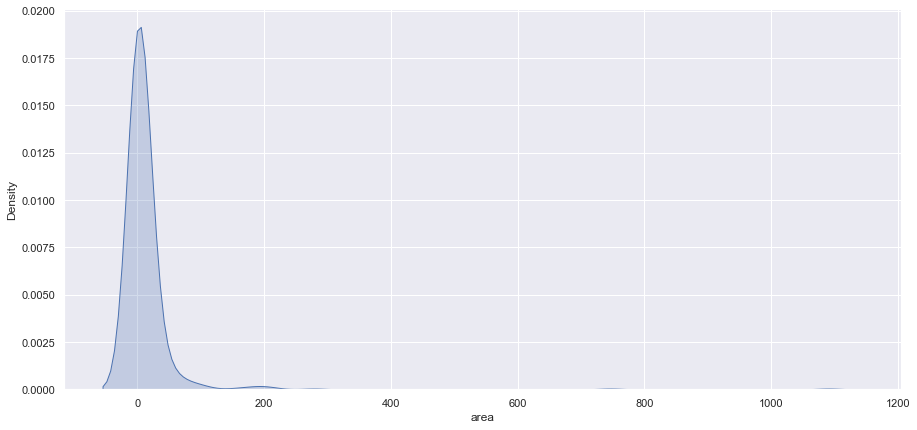

In [11]:
# plot distribusi area
sns.set(rc={'figure.figsize':(15,7)})
sns.kdeplot(data=dataset, x="area",fill=True)
plt.show()

Dataset area sangat condong (skew) positif dan memiliki kurtosis yang sangat besar, dari plot distribusi menunjukan bahwa **sebagian besar area kebakaran hutan kurang dari 100 hektar lahan.**

Penulis dataset menyarankan untuk menerapkan transformasi ke atribut area untuk mengurangi skewness dan meningkatkan simetri distribusi variabel target. dalam projek ini juga dilakukan percobaan training terhadap area yang ditransformasikan dengan ln(x+1)

In [12]:
dataset['area_log'] = dataset.area.apply(lambda x: math.log(x+1))

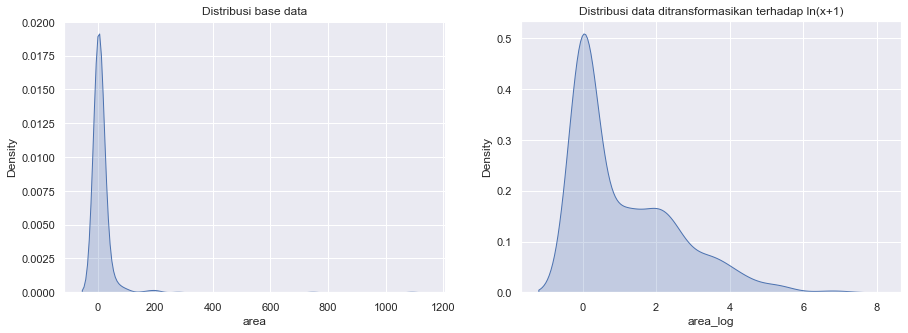

In [13]:
# plot distribusi area
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.kdeplot(data=dataset, x="area",fill=True)
plt.title('Distribusi base data')

plt.subplot(1,2,2)
sns.kdeplot(data=dataset, x="area_log",fill=True)
plt.title('Distribusi data ditransformasikan terhadap ln(x+1)')
plt.show()

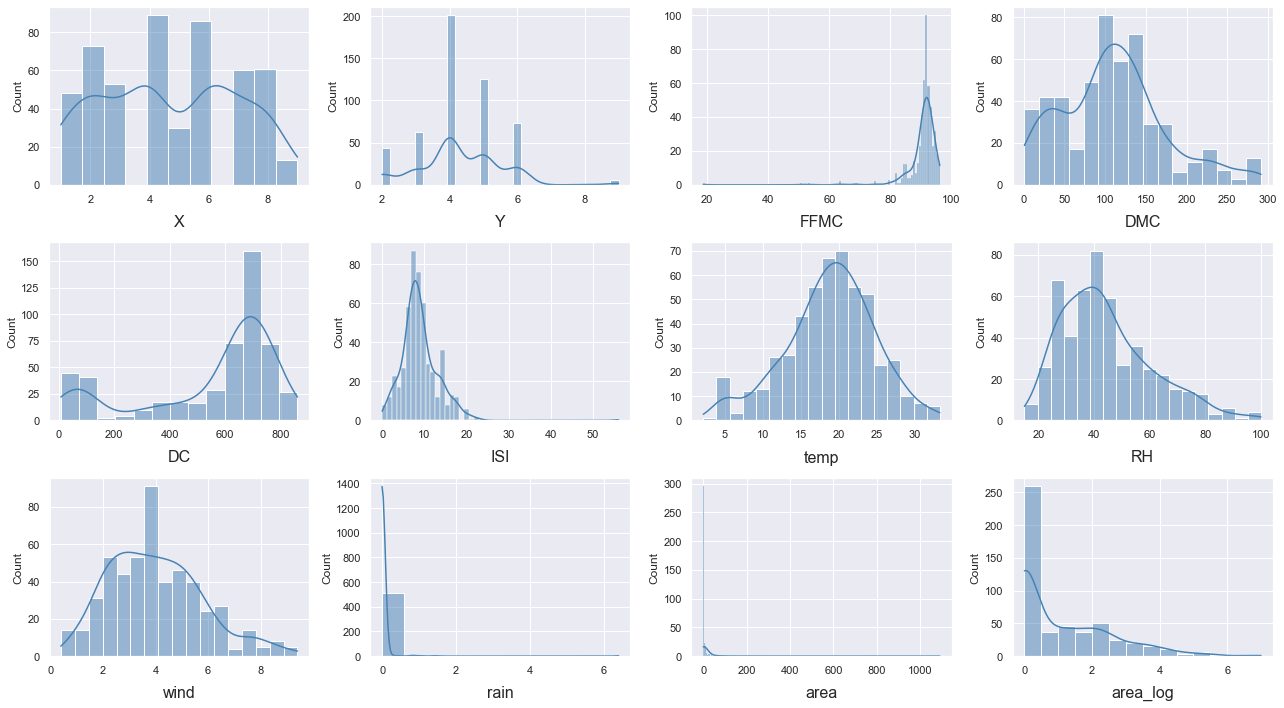

In [14]:
# plot univariate barplot
num_cols = dataset.select_dtypes(include='number').columns.to_list()
plt.figure(figsize=(18, 10))
for index in range(0, len(num_cols)):
    plt.subplot(3, 4, index+1)
    sns.histplot(dataset[num_cols[index]], color='steelblue', kde=True)
    plt.xlabel(num_cols[index], fontsize='16', labelpad=10)
    plt.tight_layout()

plt.show();

In [15]:
month_order = ['dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

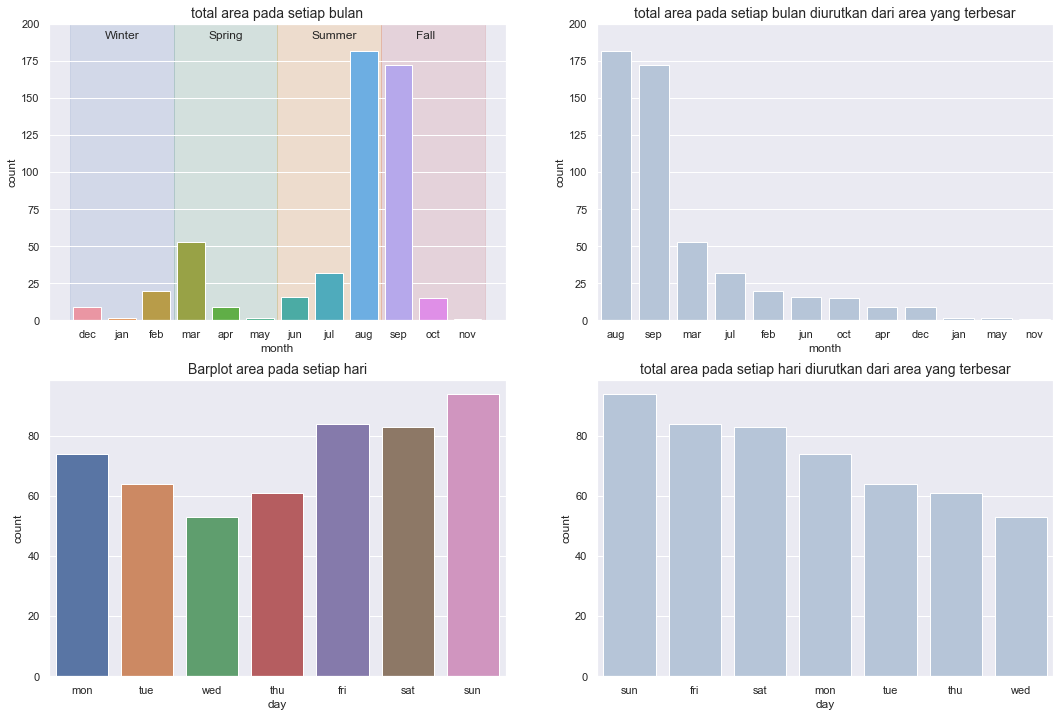

In [16]:
fig = plt.figure(figsize=(18, 12), facecolor='white')
ax = fig.add_subplot(2, 2, 1)
ax = sns.countplot(x='month', data=dataset,order = month_order)
season = {'Winter':'b','Spring':'g','Summer':'darkorange', 'Fall':'r'}
for i in range(4):
    x1 = (i*3)-0.5
    x2 = (i*3)+2.5
    ax.axvspan(x1,x2, color=list(season.values())[i], alpha=0.15,zorder=0)
    ax.text(x1-0.5+((x2-x1)/2), 190,list(season.keys())[i], fontsize=12)
ax.set(ylim=(0, 200))
ax.set_title('total area pada setiap bulan',fontsize=14)

ax = fig.add_subplot(2, 2, 2)
ax = sns.countplot(x='month', data = dataset, color='lightsteelblue', order = dataset['month'].value_counts().index)
ax.set(ylim=(0, 200))
ax.set_title('total area pada setiap bulan diurutkan dari area yang terbesar',fontsize=14)

ax = fig.add_subplot(2, 2, 3)
ax = sns.countplot(x='day', data=dataset,order = day_order)
ax.set_title('Barplot area pada setiap hari',fontsize=14)

ax = fig.add_subplot(2, 2, 4)
ax = sns.countplot(x='day', data=dataset, color='lightsteelblue', order = dataset['day'].value_counts().index)
ax.set_title('total area pada setiap hari diurutkan dari area yang terbesar',fontsize=14)

plt.show()

dari barplot data ditunjukan area kebakaran terbanyak ditunjukan pada **bulan agustus** yang kemudian disusul bulan september, kejadian tersebut terjadi pada musim panas menuju kemarau. Namun data kebakaran tidak tersebar merata untuk setiap bulannya. Untuk kasus hari, dimulai hari jumat menunjukan kasus kebakaran mulai naik hingga pada puncaknya pada **hari minggu**, yang kemudian turun kembali di hari senin atau hari kerja. bisa dikatakan kebakaran sering terjadi di akhir pekan


In [17]:
print('Pesebaran data untuk setiap bulan:')
print(dataset.month.value_counts())

Pesebaran data untuk setiap bulan:
aug    182
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


jumlah data bulan sangat tidak seimbang untuk memiliki 12 kateogori, hal ini dapat menyebabkan overfitting. oleh karena itu fitur bulan dapat diubah menjadi fitur kategori yang lebih ringkas seperti fitur musim (season)

In [18]:
def to_season(month):
    if month in ['dec', 'jan', 'feb']:
        return 'winter'
    elif month in ['mar', 'apr', 'may']:
        return 'spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'summer'
    else:
        return 'fall'

In [19]:
dataset['season'] = dataset['month'].apply(to_season) 

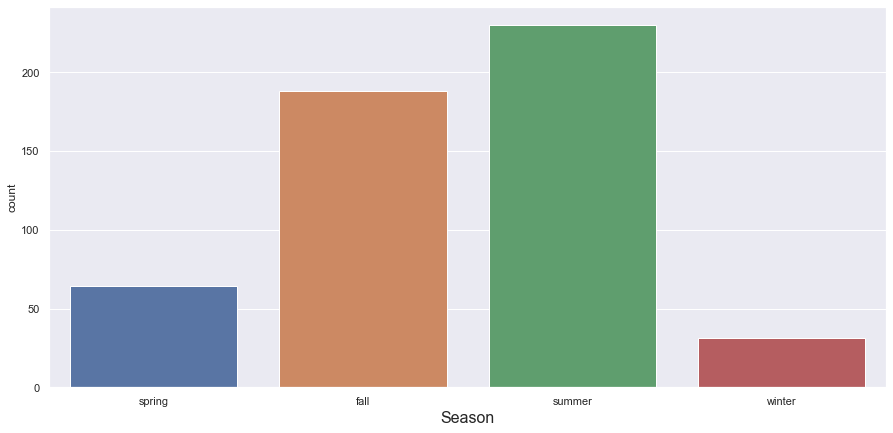

In [20]:
sns.countplot(x = 'season', data = dataset )
plt.xlabel('Season',fontsize='16')
plt.show()

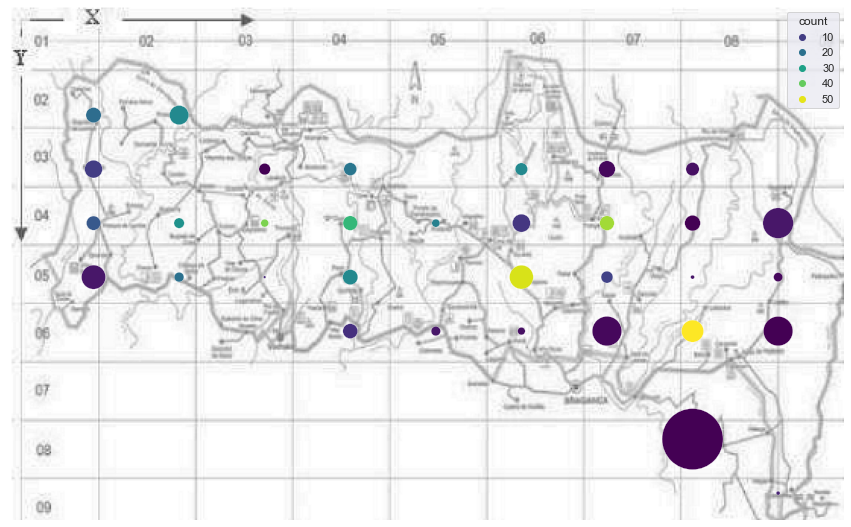

In [21]:
# Peta titik koordinasi kebakaran 
montesinho_park = dataset.groupby(['X', 'Y']).agg(
    area_mean = pd.NamedAgg(column='area', aggfunc='mean'),
    count = pd.NamedAgg(column='X', aggfunc='count'),
).reset_index()

fig, ax = plt.subplots(figsize=(15, 12))
plt.gca().invert_yaxis()
ax.axis('off')
img = mpimg.imread('The-map-of-Montesinho-natural-park.png')
ax = ax.imshow(img)

montesinho_park['X'] = montesinho_park['X'].apply(lambda x: x*img.shape[0]/6)
montesinho_park['Y'] = montesinho_park['Y'].apply(lambda x: x*img.shape[1]/15.5)

ax = sns.scatterplot(x='X', y='Y', hue='count', s=montesinho_park['area_mean']*20, data=montesinho_park, palette="viridis")
plt.show()

rata-rata area kebakaran terbesar berada pada koordinat X,Y **(8,8)** dan sedangkan jumlah kejadian kebakaran terbanyak terletak pada koordinat **(8,6)**

### Bivariate Analysis

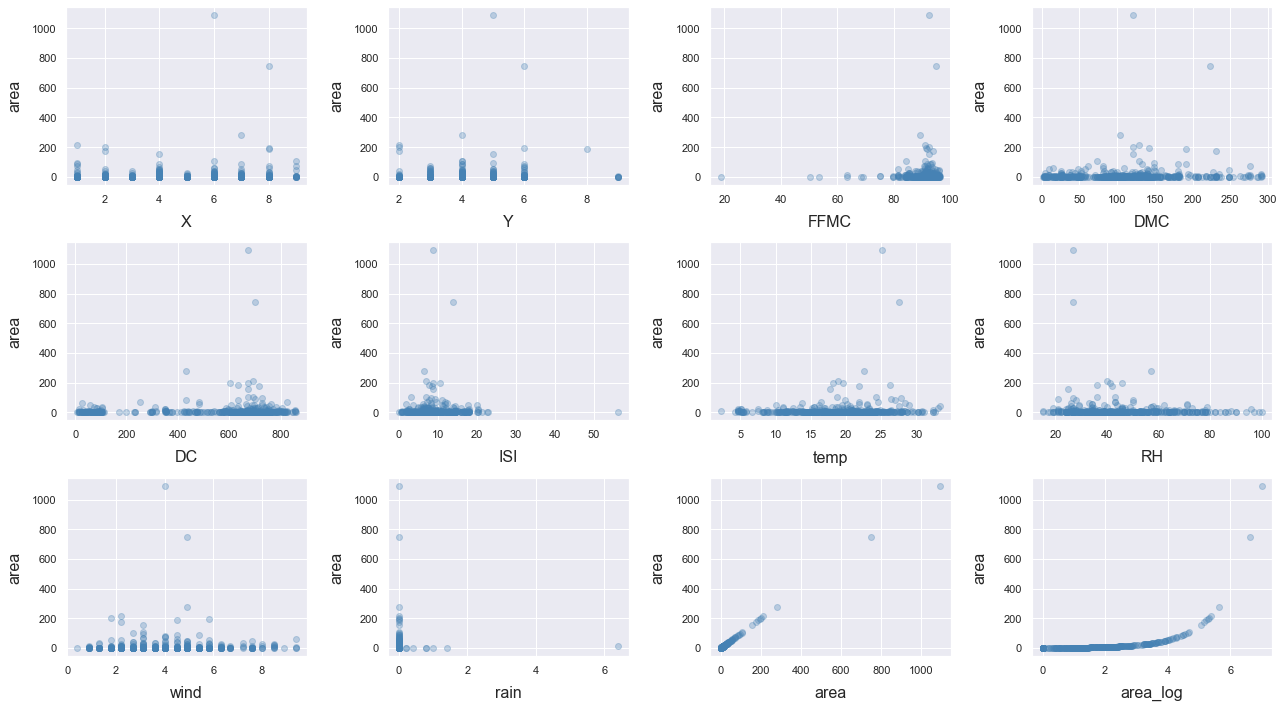

In [22]:
plt.figure(figsize=(18, 10))
for index in range(0, len(num_cols)):
    plt.subplot(3, 4, index+1)
    plt.scatter(dataset[num_cols[index]], dataset['area'], color='steelblue',alpha=0.3)
    plt.ylabel('area', fontsize='16', labelpad=10)
    plt.xlabel(num_cols[index], fontsize='16', labelpad=10)
    plt.tight_layout()

plt.show();

dari setiap fitur data numerik terhadap area tidak menunjukkan adanya hubungan seperti suatu **trend** atau **kluster**

### Multivariate Analysis

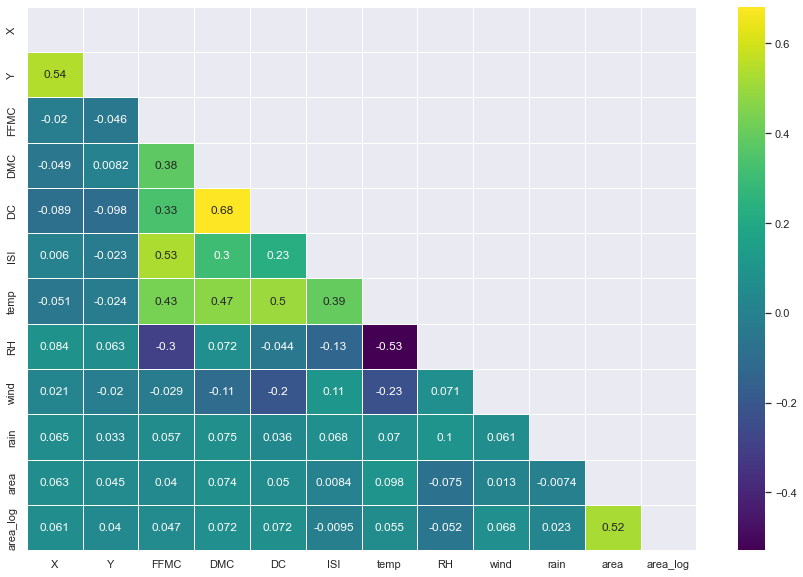

In [23]:
plt.figure(figsize=(15,10))

corr = dataset.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, mask=mask,  annot=True, cmap='viridis', linewidths=.5)
plt.show();

korelasi setiap fitur terhadap variabel target 'area' memiliki hubungan yang **tidak kuat** karena setiap fitur hampir memiliki **nilai korelasi mendekati nol**

### Outlier

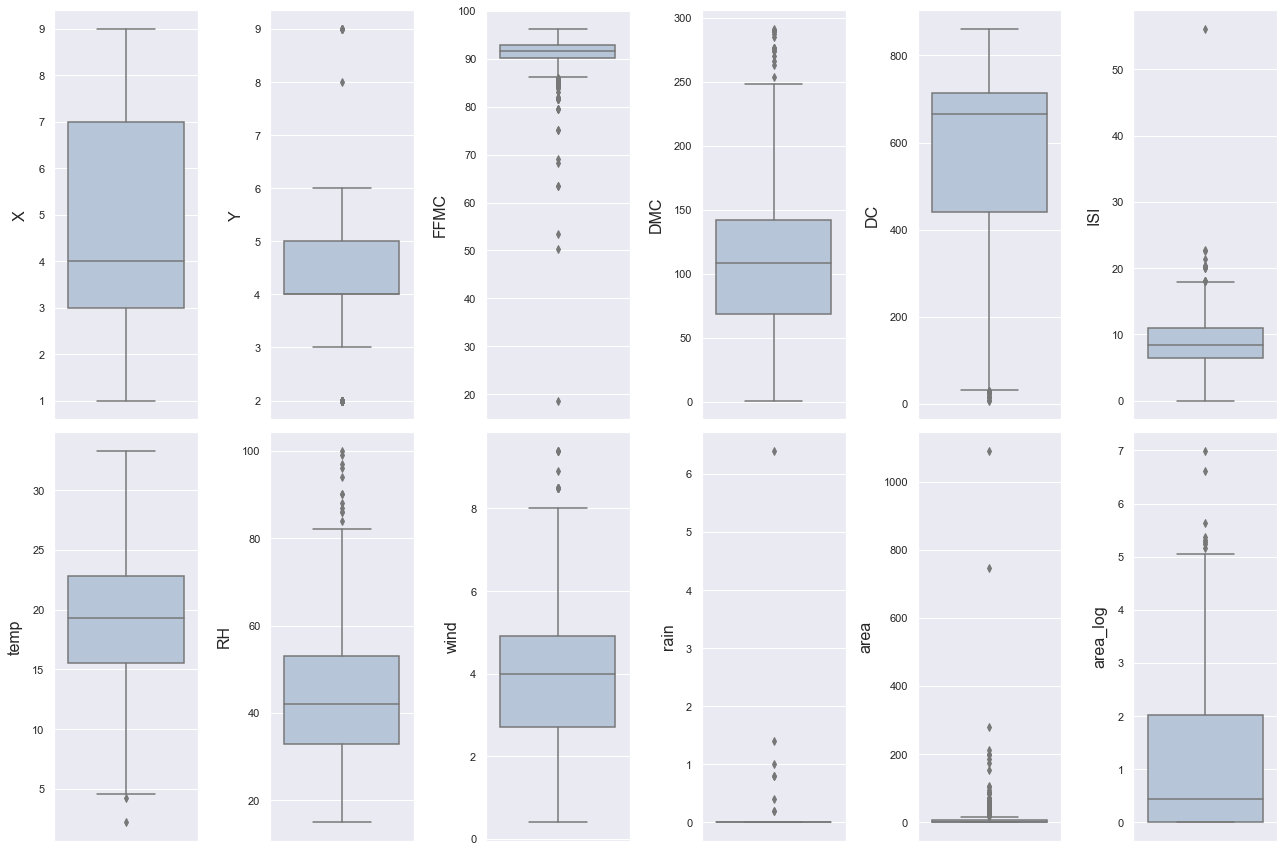

In [24]:
# barplot numerical feature
plt.figure(figsize=(18, 12))
for index in range(len(num_cols)):
    plt.subplot(2, round(len(num_cols)/2), index+1)
    sns.boxplot(y=dataset[num_cols[index]], color='lightsteelblue', orient='v')
    plt.ylabel(num_cols[index], fontsize='16', labelpad=10)
    plt.tight_layout()

plt.show();

In [25]:
# jumlah outlier
Q1 = dataset[num_cols].quantile(0.25)
Q3 = dataset[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier = ((dataset[num_cols] < (lower)) | (dataset[num_cols] > (upper))).sum()
print(outlier)

X            0
Y           51
FFMC        53
DMC         17
DC          17
ISI         14
temp         2
RH          12
wind        13
rain         8
area        62
area_log     8
dtype: int64


jika dilihat dari segi boxplot, data sangat memiliki banyak outlier. Apabila outlier dihilangkan atau ditangani maka akan merubah informasi asli dari dataset, maka perlu melakukan pendekatan lainnya untuk mendeteksi outlier. dalam projek ini akan menggunakan isolation forest untuk mendeteksi outlier

In [26]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
preds = isf.fit_predict(dataset[num_cols])
dataset["outliers"] = preds

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [27]:
print(dataset["outliers"].value_counts())

 1    502
-1     11
Name: outliers, dtype: int64


menggunakan teknik isolation forest didapatkan 11 outlier ditandai dengan nilai -1

In [28]:
num_cols = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']

def highlight_outlier(x):
    c1 = 'background-color: khaki'
    c2 = 'color: mediumblue; font-weight:bold'
    c3 = 'color: firebrick; font-weight:bold'
    c4 = 'background-color: red'
    
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    #set new columns by condition
    for i, col in enumerate(num_cols):
        df.loc[(x[col] > upper[i]), col] = c1
        df.loc[(x[col] < lower[i]), col] = c1
        df.loc[((x[col] == max(x[col])) & (~((x[col] > upper[i]) | (x[col] < lower[i]))), col)] = c2
        df.loc[((x[col] == min(x[col])) & (~((x[col] > upper[i]) | (x[col] < lower[i]))), col)] = c3
        df.loc[((x[col] > upper[i]) | (x[col] < lower[i])) & (x[col] == max(x[col])), col] = c2+';'+c1
        df.loc[((x[col] > upper[i]) | (x[col] < lower[i])) & (x[col] == min(x[col])), col] = c3+';'+c1
    df.loc[(x['outliers'] != 1),'outliers'] = c4
    return df

dataset.sort_values("outliers").style.apply(highlight_outlier, axis=None)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log,season,outliers
420,8,8,aug,wed,91.700000,191.400000,635.900000,7.800000,26.200000,36,4.500000,0.000000,185.760000,5.229824,summer,-1
237,1,2,sep,tue,91.000000,129.500000,692.600000,7.000000,18.800000,40,2.200000,0.000000,212.880000,5.365415,fall,-1
499,7,5,aug,tue,96.100000,181.100000,671.200000,14.300000,27.300000,63,4.900000,6.400000,10.820000,2.469793,summer,-1
236,2,2,sep,sat,92.500000,121.100000,674.400000,8.600000,18.200000,46,1.800000,0.000000,200.940000,5.307971,fall,-1
312,2,4,sep,sun,50.400000,46.200000,706.600000,0.400000,12.200000,78,6.300000,0.000000,0.000000,0.000000,fall,-1
469,6,3,apr,sun,91.000000,14.600000,25.600000,12.300000,13.700000,33,9.400000,0.000000,61.130000,4.129229,spring,-1
238,6,5,sep,sat,92.500000,121.100000,674.400000,8.600000,25.100000,27,4.000000,0.000000,1090.840000,6.995620,fall,-1
465,2,2,feb,sat,79.500000,3.600000,15.300000,1.800000,4.600000,59,0.900000,0.000000,6.840000,2.059239,winter,-1
377,2,2,aug,sat,93.700000,231.100000,715.100000,8.400000,21.900000,42,2.200000,0.000000,174.630000,5.168380,summer,-1
379,4,5,jan,sun,18.700000,1.100000,171.400000,0.000000,5.200000,100,0.900000,0.000000,0.000000,0.000000,winter,-1


tabel ditunjukan data jika diurutkan berdasarkan outlier isolation forest. cell dengan block kuning merupakan outlier dari setiap kolomnya, angka bewarna merah merupakan nilai minimum dari kolom sedangkan biru merupakan nilai maximum dari kolom. data outlier yang dideteksi oleh isolation forest memang terdapat anomali. contoh pada index 379 menunjuk nilai outlier dan nilai maksimum dari fitur `RH` dan minimum pada `FFMC`, index 499 menunjukan nilai outlier dan nilai maksimum dari fitur `rain`, dan index 238 menunjukan nilai `area` yang sangat besar dibandingkan nilai lainnya. untuk projek ini outlier akan dihapus

In [29]:
dataset_new = dataset[dataset['outliers'] == 1]
dataset_new = dataset_new.drop(['outliers'], axis=1)
dataset_new.reset_index(inplace=True,drop=True)

## Feature Engineering

In [30]:
dataset_new.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log,season
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,spring
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,fall
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,fall
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,spring
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,spring


In [31]:
dataset_new = dataset_new.drop(['month'], axis=1)

In [32]:
dataset_new = pd.get_dummies(dataset_new, prefix=['day', 'season'], drop_first= True)

In [33]:
dataset_new.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,area_log,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,season_spring,season_summer,season_winter
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0,0,0,0,0,0,1,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,0,0,0,0,1,0,0,0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,0,1,0,0,0,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0,0,0,0,0,0,1,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0,0,1,0,0,0,1,0,0


## Modeling

In [34]:
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from keras.regularizers import l1
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [35]:
def plot_model(x_train, y_train, x_test, y_test, history, model, key, model_type):
    _, train_eval = model.evaluate(x_train, y_train, verbose=0)
    _, valid_eval = model.evaluate(x_test, y_test, verbose=0)
    
    if model_type == 'regression':
        metric = 'mse'
        val_metric = 'val_mse'
    else:
        metric = 'accuracy'
        val_metric = 'val_accuracy'
    
    plt.plot(history.history[metric])
    plt.plot(history.history[val_metric])
    plt.title(key)
    plt.legend(['Train: '+str(round(train_eval,3)), 'Test: '+str(round(valid_eval,3))])

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
def eval_model_regression(y_pred, y_test):
    return {
        'mae': mean_absolute_error(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred, squared=True),
        'rmse': mean_squared_error(y_test, y_pred, squared=False)
    }

In [37]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
def eval_model_classification(y_pred, y_test):
    y_pred = (y_pred>0.5)
    return {
        'auc': roc_auc_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    }

In [38]:
def fit_model(x_train, y_train, x_test, y_test, epoch=100, batch_size=[280], optimizer=[RMSprop()], model_type='regression'):
    history_all = {}
    model_all = {}
    eval_model = {} 
    input_dim = x_train.shape[1]
    
    xaxes = len(optimizer)
    yaxes = len(batch_size)
    if yaxes > xaxes:
        yaxes, xaxes = xaxes, yaxes
    
    i = 1
    
    for batch in batch_size:
        for opt in optimizer:
            # name untuk dict keys
            name_opt = opt.get_config()['name']
            key = f'{name_opt} - Batch: {batch}'

            # model building
            model = Sequential()
            
            if model_type == 'regression':
                model.add(Dense(32, input_dim=input_dim,activation='relu',))
                model.add(Dense(32,activation='relu'))
                model.add(Dense(32,activation='relu'))
                model.add(Dense(32,activation='relu'))
                model.add(Dropout(0.5))
                model.add(Dense(1))
                
                model.compile(optimizer=opt, loss='mse', metrics=['mse'])
                
            elif model_type == 'classification':
                n = y_train.shape[1]
                model.add(Dense(input_dim+10, input_dim=input_dim,activation='relu'))
                model.add(Dense(16,activation='relu'))
                model.add(Dense(n,activation='sigmoid'))
                
                if n > 1:
                    loss = 'sparse_categorical_crossentropy'
                else:
                    loss = 'binary_crossentropy'
                    
                model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
                
            es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=100)
            
            # model fitting
            history = model.fit(x_train, y_train, 
                                validation_data = (x_test, y_test), 
                                epochs = epoch, 
                                batch_size = batch,
                                callbacks=[es], 
                                verbose = 0)
            
            # model evaluasi
            if model_type == 'regression':
                eval_model[key] = eval_model_regression(model.predict(x_test), y_test)
            elif model_type == 'classification':
                eval_model[key] = eval_model_classification(model.predict(x_test), y_test)
            
            # plot eval model
            if xaxes != 1 or yaxes != 1 :
                plt.subplot(xaxes,yaxes,i)
            plot_model(x_train, y_train,
                       x_test, y_test,
                       history,model,key,model_type)
            i += 1
            
            history_all[key] = history
            model_all[key] = model

    return history_all, model_all, eval_model

## Regresi

In [39]:
x_r = dataset_new.drop(['area','area_log'], axis = 1)
y_r = dataset_new[['area']]

### Base Data

In [77]:
x_train_r, x_test_r, y_train_r, y_test_r  = train_test_split(x_r, y_r, test_size = 0.2, random_state = 42)

In [78]:
print(x_train_r.shape,y_train_r.shape)
print(x_test_r.shape,y_test_r.shape)

(401, 19) (401, 1)
(101, 19) (101, 1)


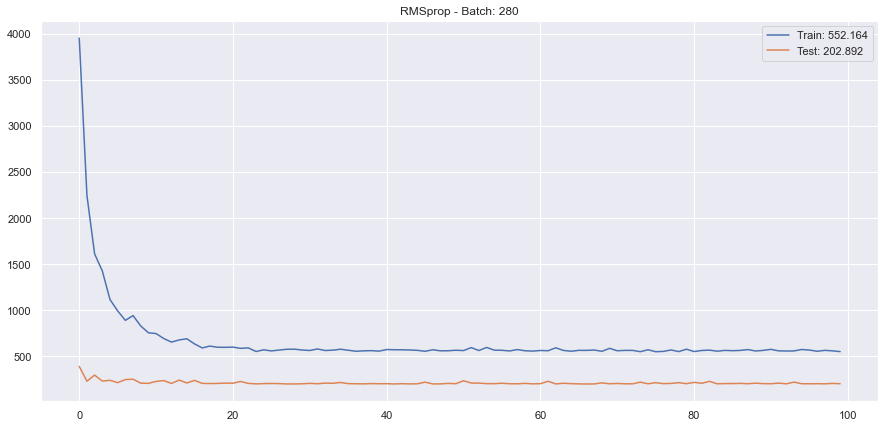

In [79]:
history, model, eval_model = fit_model(x_train_r, y_train_r, x_test_r, y_test_r)

In [80]:
pd.DataFrame(eval_model).transpose()

,mae,mse,rmse
RMSprop - Batch: 280,8.737835,202.89214,14.244021


dari model didapatkan nilai error dari nilai sebenarnya yaitu untuk MAE 8.16 dan RMSE 14.12 hektar

#### Eksperimen Batch dan Optimizer

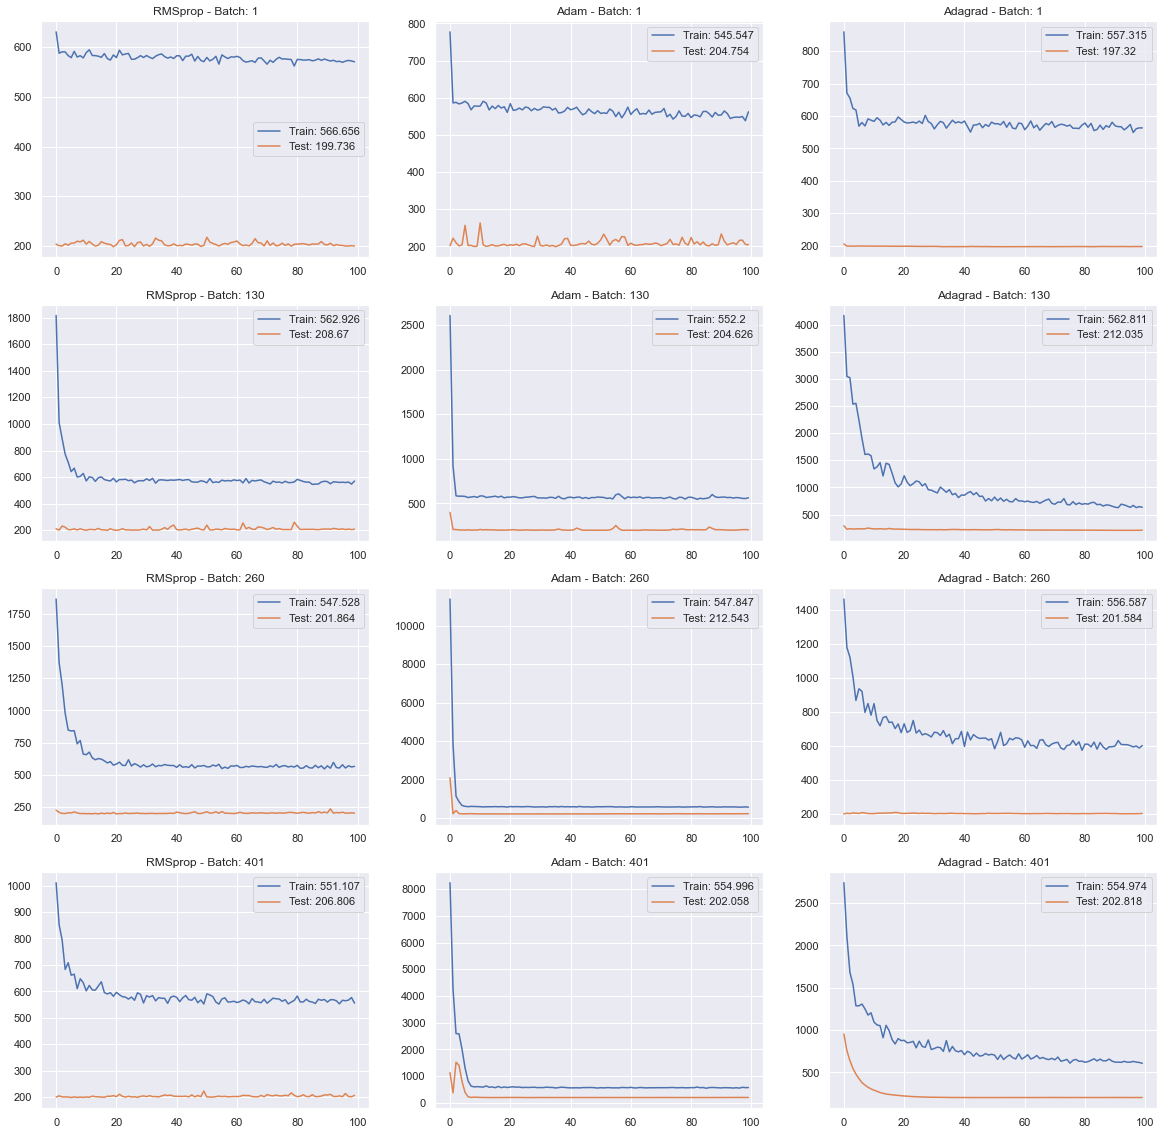

In [81]:
plt.figure(figsize=[20,20])
histories, models, eval_models = fit_model(x_train_r, y_train_r, x_test_r, y_test_r,
                                          batch_size=[1,130,260,len(x_train_r)], 
                                          optimizer=[RMSprop(),Adam(), Adagrad()])

In [82]:
pd.DataFrame(eval_models).transpose().sort_values('mae').style.highlight_min(color = 'lightgreen', axis = 0)

,mae,mse,rmse
RMSprop - Batch: 1,7.518263,199.736308,14.132810
RMSprop - Batch: 130,7.749680,208.670263,14.445424
Adam - Batch: 1,8.088706,204.753538,14.309212
Adagrad - Batch: 1,8.569008,197.320152,14.047069
Adam - Batch: 401,8.718821,202.058149,14.214716
Adagrad - Batch: 401,8.754261,202.818022,14.241419
RMSprop - Batch: 260,8.878081,201.863530,14.207869
Adam - Batch: 260,9.134443,212.543348,14.578866
Adagrad - Batch: 260,9.143892,201.584274,14.198038
Adam - Batch: 130,9.393252,204.625768,14.304746


dari beberapa eksperimen untuk MAE terkecil didapatkan model optimizer Adagrad dengan batch size 401. namun dalam project ini akan diambil model optimizer RMSprop dengan batch size 1 karena memiliki nilai error RMSE terkecil dan MAE terkecil kedua

In [83]:
y_pred_r = models['RMSprop - Batch: 1'].predict(x_test_r)

### Transformed Data (ln(x+1))

In [84]:
y_rlog = dataset_new[['area_log']]

In [85]:
x_train_rlog, x_test_rlog, y_train_rlog, y_test_rlog = train_test_split(x_r, y_rlog, test_size = 0.2, random_state = 42)

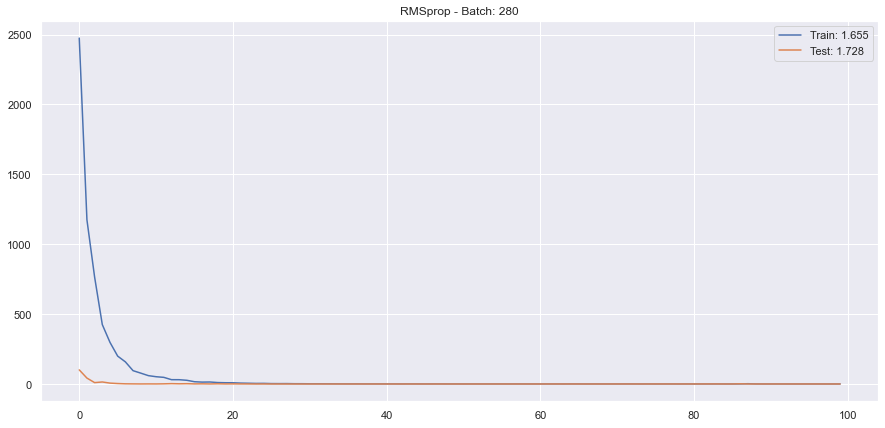

In [86]:
history_log, model_log, eval_model_log = fit_model(x_train_rlog, y_train_rlog, x_test_rlog, y_test_rlog)

In [87]:
pd.DataFrame(eval_model_log).transpose()

,mae,mse,rmse
RMSprop - Batch: 280,1.104127,1.728191,1.314607


#### Eksperimen Batch dan Optimizer

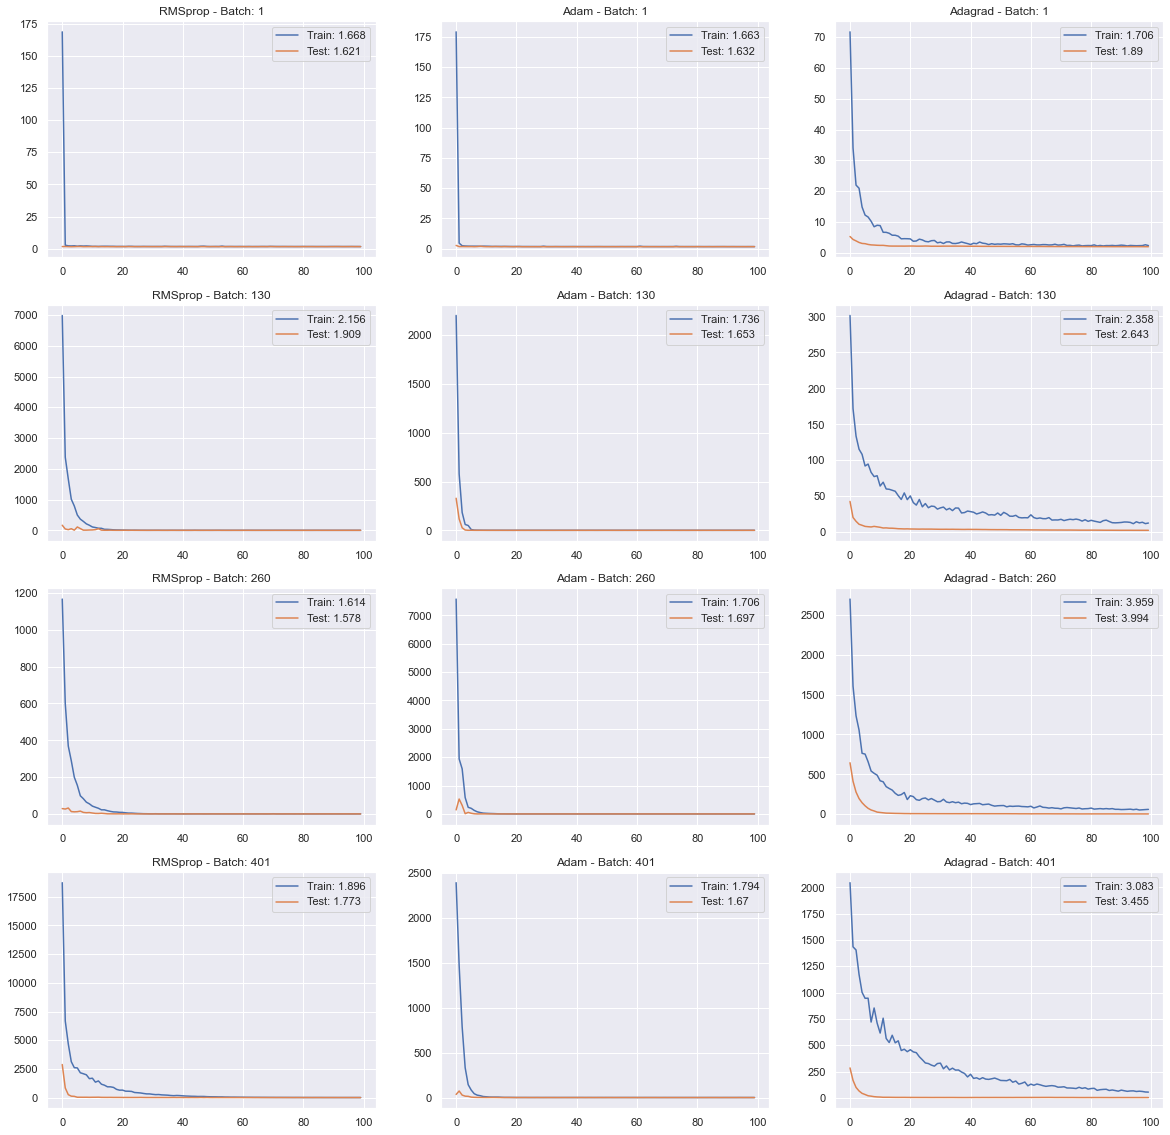

In [88]:
plt.figure(figsize=[20,20])
histories_log, models_log, eval_models_log = fit_model(x_train_rlog, y_train_rlog, 
                                                       x_test_rlog, y_test_rlog,
                                                       batch_size=[1,130,260,len(x_train_rlog)], 
                                                       optimizer=[RMSprop(),Adam(), Adagrad()])

In [89]:
pd.DataFrame(eval_models_log).transpose().sort_values('mae').style.highlight_min(color = 'lightgreen', axis = 0)

,mae,mse,rmse
RMSprop - Batch: 130,1.007634,1.909214,1.381743
RMSprop - Batch: 401,1.037351,1.772560,1.331375
RMSprop - Batch: 260,1.051957,1.577563,1.256011
Adam - Batch: 401,1.067535,1.669784,1.292201
Adam - Batch: 130,1.080783,1.653258,1.285791
Adam - Batch: 260,1.094230,1.696757,1.302596
RMSprop - Batch: 1,1.098296,1.621090,1.273220
Adam - Batch: 1,1.110472,1.631896,1.277457
Adagrad - Batch: 1,1.145380,1.890404,1.374920
Adagrad - Batch: 130,1.377385,2.643445,1.625868


In [90]:
eval_models_exp = {}
for m in models_log:
    y_pred_rlog = models_log[m].predict(x_test_rlog)
    exponen = lambda x: math.exp(x)-1
    y_pred_r = np.array([exponen(xi) for xi in y_pred_rlog])
    eval_models_exp[m] = eval_model_regression(y_test_rlog,y_pred_r)

In [91]:
pd.DataFrame(eval_models_exp).transpose().sort_values('mae').style.highlight_min(color = 'lightgreen', axis = 0)

,mae,mse,rmse
RMSprop - Batch: 130,1.017944,1.815157,1.347278
Adam - Batch: 401,1.178289,1.787759,1.337071
RMSprop - Batch: 401,1.189774,2.227834,1.492593
Adam - Batch: 130,1.259938,1.987912,1.409933
Adam - Batch: 260,1.299940,2.208202,1.486002
RMSprop - Batch: 260,1.315327,2.301709,1.517138
RMSprop - Batch: 1,1.405411,2.471464,1.572089
Adam - Batch: 1,1.475703,2.746651,1.657302
Adagrad - Batch: 1,2.091920,25.947453,5.093864
Adagrad - Batch: 130,3.459477,31.073974,5.574403


In [94]:
y_pred_rlog = models_log['Adam - Batch: 401'].predict(x_test_rlog)
exponen = lambda x: math.exp(x)-1
y_pred_trans = np.array([exponen(xi) for xi in y_pred_rlog])

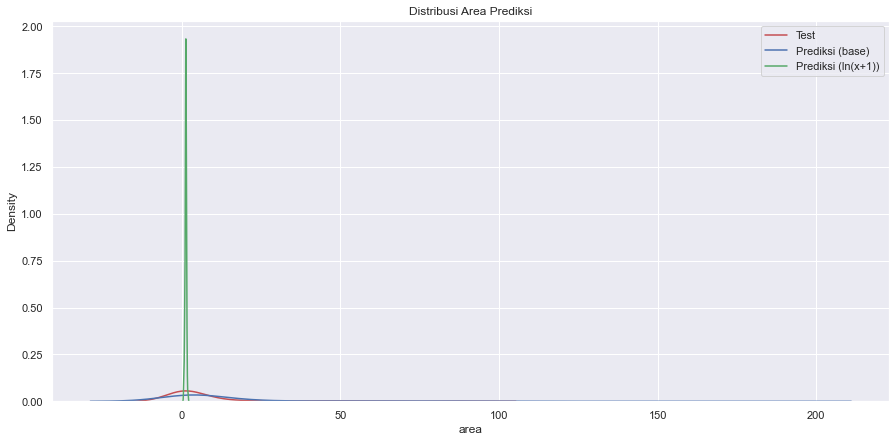

In [97]:
plt.figure(figsize=(15,7))
ax = sns.kdeplot(y_test_r.area, color="r",legend=True)
ax = sns.kdeplot(y_pred_r.flatten(), color="b",legend=True)
ax = sns.kdeplot(y_pred_trans.flatten(), color="g",legend=True)
plt.legend(['Test','Prediksi (base)','Prediksi (ln(x+1))'])
plt.title('Distribusi Area Prediksi')
plt.show()

## Klasifikasi

### Binary (Burn or Not Burn)

In [57]:
dataset_new['is_burn'] = dataset_new['area'].apply(lambda area: 1 if area > 0 else 0) 
x_cb = dataset_new.drop(['is_burn','area_log'], axis = 1)
y_cb = dataset_new[['is_burn']]

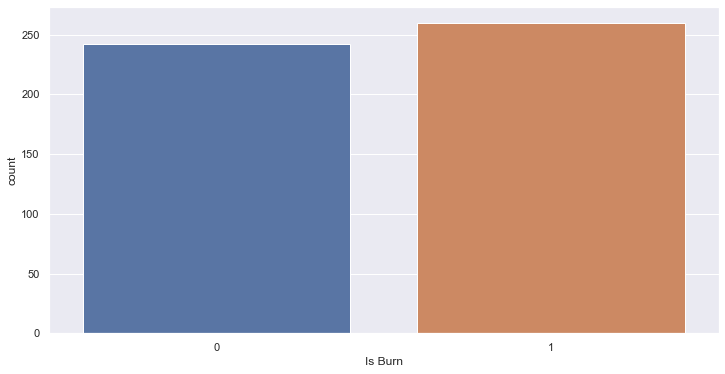

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'is_burn', data = dataset_new)
plt.xlabel('Is Burn')
plt.ylabel('count')
plt.show()

In [59]:
y_cb.value_counts()

is_burn
1          260
0          242
dtype: int64

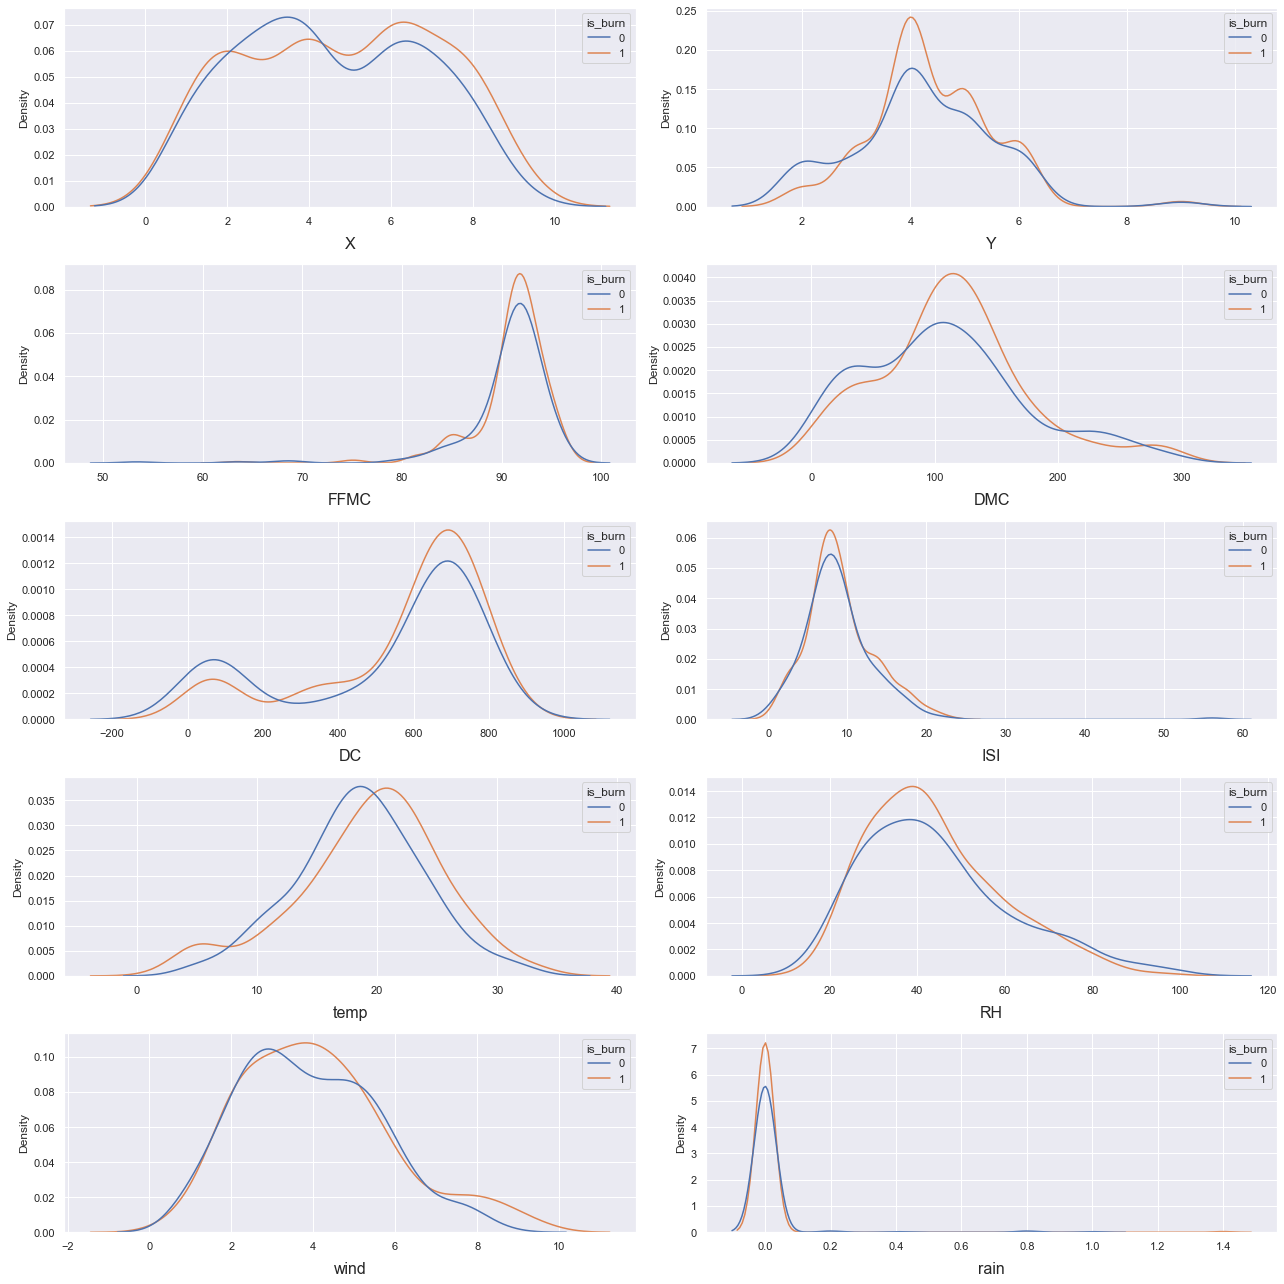

In [60]:
features_name = dataset.loc[:, ~dataset.columns.isin(['area', 'area_log','season','outliers'])].select_dtypes(include='number').columns.to_list()

plt.figure(figsize=(18, 18))
for index in range(0, len(features_name)):
    plt.subplot(5, 2, index+1)
    sns.kdeplot(x=features_name[index],  hue='is_burn', data=dataset_new)
    plt.xlabel(features_name[index], fontsize='16', labelpad=10)
    plt.tight_layout()

plt.show();

In [61]:
x_train_cb, x_test_cb, y_train_cb, y_test_cb = train_test_split(x_cb, y_cb, test_size = 0.2, random_state = 42)

In [62]:
y_train_cb.value_counts()

is_burn
1          214
0          187
dtype: int64

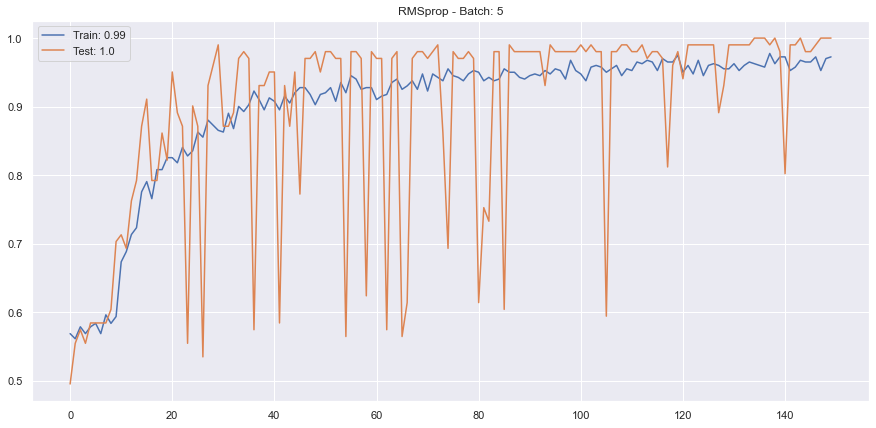

In [63]:
history, model, eval_model = fit_model(x_train_cb, y_train_cb, 
                                       x_test_cb, y_test_cb,
                                       model_type='classification',
                                       epoch = 150,
                                       batch_size=[5],
                                       optimizer=[RMSprop()])

In [64]:
pd.DataFrame(eval_model).transpose()

,accuracy,auc,precision,recall
RMSprop - Batch: 5,1.0,1.0,1.0,1.0


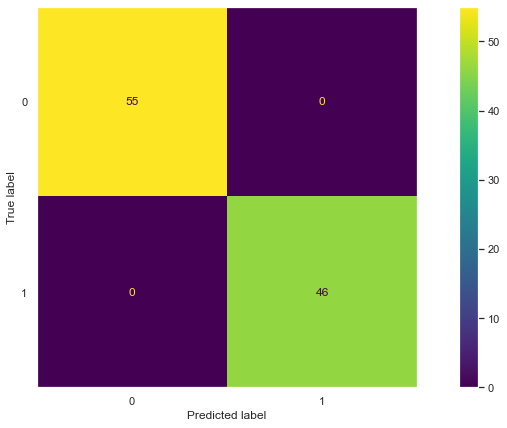

In [65]:
y_pred_cb = (model['RMSprop - Batch: 5'].predict(x_test_cb) > 0.5)
cm = confusion_matrix(y_test_cb,y_pred_cb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [98]:
x_cb_2 = x_cb.drop(['area'], axis = 1)

In [99]:
x_train_cb_2, x_test_cb_2, y_train_cb_2, y_test_cb_2 = train_test_split(x_cb_2, y_cb, test_size = 0.2, random_state = 42)

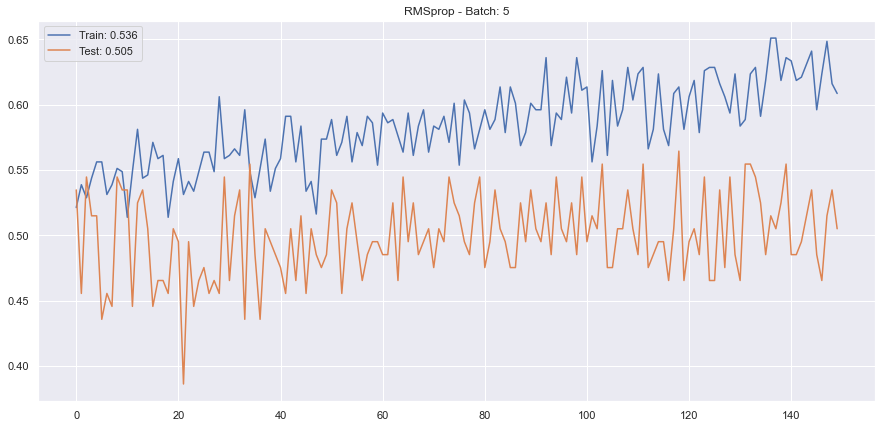

In [100]:
history, model, eval_model = fit_model(x_train_cb_2, y_train_cb_2, 
                                       x_test_cb_2, y_test_cb_2,
                                       model_type='classification',
                                       epoch = 150,
                                       batch_size=[5],
                                       optimizer=[RMSprop()])

In [101]:
pd.DataFrame(eval_model).transpose()

,accuracy,auc,precision,recall
RMSprop - Batch: 5,0.50495,0.47253,0.357143,0.108696


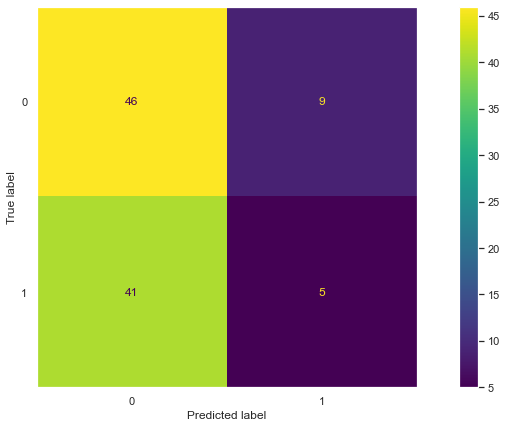

In [105]:
y_pred_cb_2 = (model['RMSprop - Batch: 5'].predict(x_test_cb_2) > 0.5)
cm = confusion_matrix(y_test_cb_2,y_pred_cb_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

### Multiclass (Clustering)

In [66]:
dataset_clus = dataset_new.drop(['area_log','is_burn'],axis = 1)

In [67]:
from sklearn.preprocessing import normalize
dataset_scaled = normalize(dataset_clus)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset_clus.columns)
dataset_scaled.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,season_spring,season_summer,season_winter
0,0.049717,0.035512,0.612233,0.186085,0.669763,0.036223,0.058240,0.362226,0.047587,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.007102,0.0,0.0
1,0.010336,0.005906,0.133774,0.052269,0.987952,0.009893,0.026578,0.048726,0.001329,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.001477,0.0,0.000000,0.0,0.0
2,0.010068,0.005753,0.130314,0.062856,0.987998,0.009637,0.021000,0.047465,0.001870,0.00000,0.0,0.0,0.001438,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.050395,0.037796,0.577656,0.209770,0.488204,0.056695,0.052285,0.611043,0.025198,0.00126,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.006299,0.0,0.0
4,0.045306,0.033980,0.505729,0.290525,0.578785,0.054367,0.064561,0.560662,0.010194,0.00000,0.0,0.0,0.000000,0.005663,0.0,0.000000,0.0,0.005663,0.0,0.0


In [68]:
dataset_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
X,502.0,0.012755,0.014030,0.001138,0.004298,0.007978,0.012678,0.082785
Y,502.0,0.011647,0.012054,0.002427,0.005322,0.006666,0.010195,0.082785
FFMC,502.0,0.236434,0.214177,0.093907,0.123621,0.134718,0.194539,0.915612
DMC,502.0,0.191741,0.077264,0.021832,0.137028,0.185303,0.237051,0.410154
DC,502.0,0.884751,0.188329,0.070170,0.940428,0.961313,0.976230,0.989044
ISI,502.0,0.020526,0.018786,0.001183,0.009935,0.014291,0.024008,0.222141
temp,502.0,0.042676,0.030644,0.005968,0.025479,0.031622,0.045307,0.225719
RH,502.0,0.118111,0.128012,0.020656,0.051102,0.067618,0.103616,0.724719
wind,502.0,0.011410,0.013851,0.000577,0.004052,0.006391,0.010133,0.085345
rain,502.0,0.000015,0.000139,0.000000,0.000000,0.000000,0.000000,0.001795


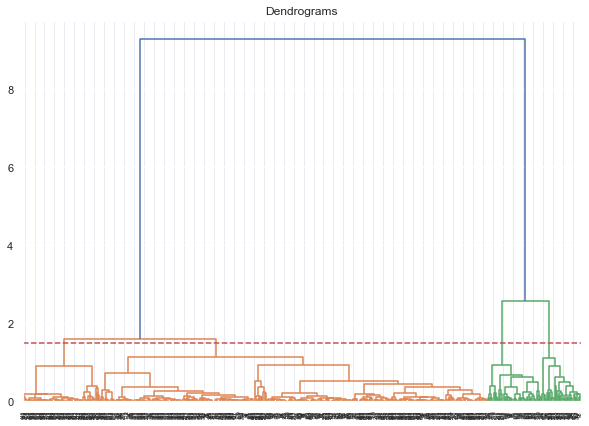

In [69]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
dataset_scaled['class'] = cluster.fit_predict(dataset_scaled)

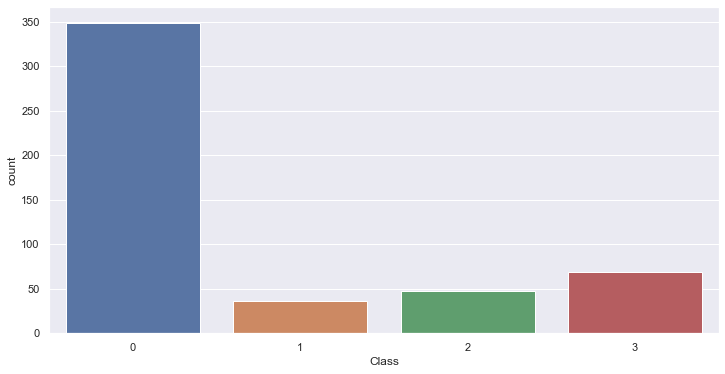

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'class', data = dataset_scaled)
plt.xlabel('Class')
plt.ylabel('count')
plt.show()

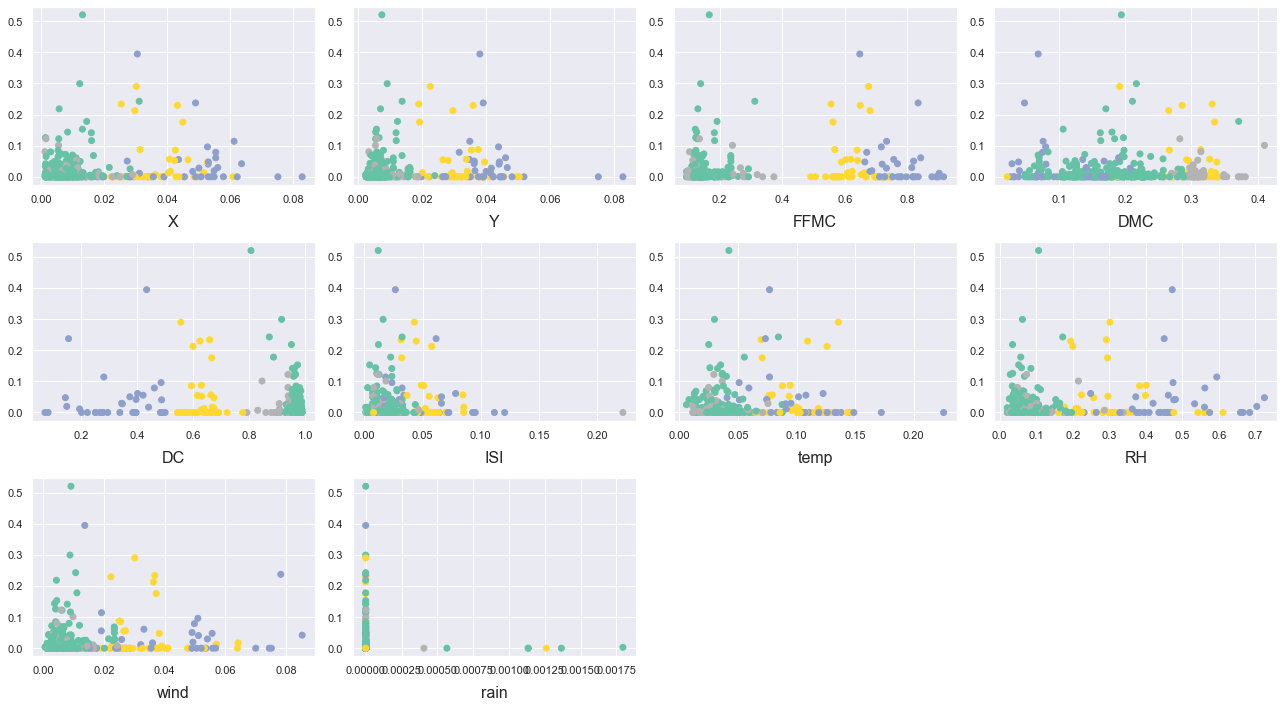

In [72]:
# plot univariate barplot
plt.figure(figsize=(18, 10))
for index in range(0, len(features_name)):
    plt.subplot(3, 4, index+1)
    plt.scatter(dataset_scaled[features_name[index]], dataset_scaled['area'], c=dataset_scaled['class'], cmap='Set2')
    plt.xlabel(num_cols[index], fontsize='16', labelpad=10)
    plt.tight_layout()

plt.show();

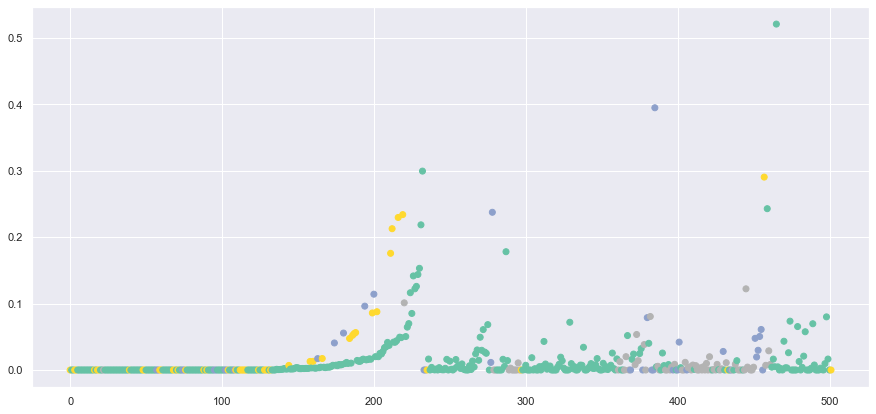

In [73]:
plt.scatter(np.arange(0,502), dataset_scaled['area'], c=dataset_scaled['class'], cmap='Set2')
plt.show()